## INSTALL RELEVANT LIBRARIES

In [ ]:
# !pip install roboflow





In [ ]:
# pip install ultralytics

## IMPORT AND UNZIPPING DATASETS

In [ ]:
from roboflow import Roboflow

In [ ]:
# !unzip /content/150frames_30to60-20230424T183245Z-001.zip

In [ ]:
# !unzip /content/reid_test-99-20230425T035826Z-001.zip

In [ ]:
# !unzip /content/ezgif_150_1-20230426T184022Z-001.zip

In [ ]:
# !mkdir test_frames

In [ ]:
# !unzip /content/final_test_frame.zip -d /content/test_frames

In [ ]:
# !mkdir test_files


In [ ]:
# !unzip /content/ezgif-2-8c562ad804-jpg.zip -d /content/test_files

## LOAD YOLOv8 MODEL

In [ ]:
# This is Model of Face bounding box
# rf = Roboflow(api_key="KNgvDxqsjJ3COfFnPrYo")
# project = rf.workspace("deep-learning-computer-vision-model").project("yolo_fine")
# dataset = project.version(1).download("yolov8")
# model_face = project.version(1).model

In [ ]:
# This is Model of Body and Face bounding box
# rf = Roboflow(api_key="KNgvDxqsjJ3COfFnPrYo")
# project = rf.workspace("deep-learning-computer-vision-model").project("yolo_botsort")
# dataset = project.version(1).download("yolov8")

# model = project.version(1).model

In [ ]:
# This is Model of Midterm Face bounding box

# rf = Roboflow(api_key="KNgvDxqsjJ3COfFnPrYo")
# project = rf.workspace("deep-learning-computer-vision-model").project("people-detection-rcmjk")
# dataset = project.version(1).download("yolov8")

# model_mid = project.version(1).model


In [ ]:
# This is Model of Face and Body bounding box

# rf = Roboflow(api_key="h57dwioLJAgcbhgpLjSJ")
# project = rf.workspace("rick-jay").project("yoloclass-ff7an")
# dataset = project.version(1).download("yolov8")

# model_fbb = project.version(1).model

In [ ]:
# This is Model of only Face bounding box - new train
rf = Roboflow(api_key="h57dwioLJAgcbhgpLjSJ")
project = rf.workspace("rick-jay").project("yoloclass_face_new")
dataset = project.version(1).download("yolov8")

model_150 = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.88, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to yoloclass_face_new-1 in yolov8:: 100%|██████████| 312/312 [00:00<00:00, 9399.41it/s]


## TEST PREDICTION

In [ ]:
print(model_150.predict("/content/test_frames/final_test_frame/0003.jpg", confidence=40, overlap=30).json())

{'predictions': [{'x': 293.0, 'y': 123.5, 'width': 100.0, 'height': 89.0, 'confidence': 0.811747670173645, 'class': '0', 'image_path': '/content/test_frames/final_test_frame/0003.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '1280', 'height': '720'}}


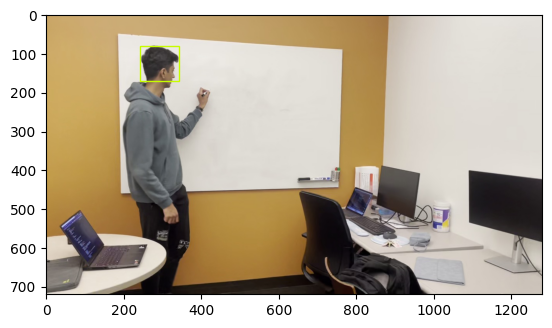

In [ ]:
prd = model_150.predict("/content/test_frames/final_test_frame/0003.jpg", confidence=40, overlap=30)
prd.plot()

In [ ]:
# parts = []
# url_base = 'https://detect.roboflow.com/'
# endpoint = '[YOUR-MODEL]'
# access_token = '?access_token=[YOUR_TOKEN]'
# format = '&format=json'
# confidence = '&confidence=10'
# stroke='&stroke=5'
# parts.append(url_base)
# parts.append(endpoint)
# parts.append(access_token)
# parts.append(format)
# parts.append(confidence)
# parts.append(stroke)
# url = ''.join(parts)

In [ ]:
import os

In [ ]:
import json

## MAKE DIR FOR JSON 

In [ ]:
# !mkdir test_print

In [ ]:
# !rm *

In [ ]:
# !mkdir final_test_json

In [ ]:
# !mkdir final_test_json_face

In [ ]:
# !mkdir mid_test_json

In [ ]:
!mkdir only_test_json

## GET MODEL RESULTS

In [ ]:
prediction = []
result = []
fine_res = []
final_res = []
face_res = []
mid_res = []
only_res = []
dir = '/content/test_frames/final_test_frame'
dir_name = "/content/only_test_json"
# i = 0
for fn in sorted(os.listdir(dir)):
  # prediction = model.predict("/content/ezgif-frame-001.jpg")
  f = os.path.join(dir,fn)
  if os.path.isfile(f):
    # print(f)
    # break
    prediction_model = model_150.predict(f)
    # file_path = os.path.join(dir_name, f"ezgif-frame-{i}.json")
    # print(prediction.json())
    prediction_model.json()
    # print(type(prediction_model))
    # print(prediction_model.json()['predictions'])
    # print(type(prediction_model.json()['predictions']))
    # break
    # prediction.save()
    for res in prediction_model.json()['predictions']:
      # result.append(res)
      # fine_res.append(res)
      # final_res.append(res)
      # face_res.append(res)
      only_res.append(res)


    prediction.append(prediction_model)



In [ ]:
print(only_res[150])
print(type(only_res[150]))

{'x': 283.0, 'y': 139.5, 'width': 114.0, 'height': 119.0, 'confidence': 0.8491897583007812, 'class': '0', 'image_path': '/content/test_frames/final_test_frame/0153.jpg', 'prediction_type': 'ObjectDetectionModel'}
<class 'dict'>


In [ ]:
# print(prediction[1])
# print(prediction[2])

In [ ]:
# !mkdir json_files

In [ ]:
# type(prediction[1])

In [ ]:
# pred = list(prediction)
# type(pred[1])
# json_string = json.dumps(prediction)
# print(type(json_string))

In [ ]:
# for i in range(len(pred)):
#   pred[i] = dict(pred[i])

In [ ]:
# print(pred)

In [ ]:
# dir_name = "/content/json_files/"
# # if not os.path.exists(dir_name):
# #     os.makedirs(dir_name)

# # for i, json_obj in enumerate(prediction):
# #   with open(f"ezgif-frame-{i}.json", "w") as outfile:
# #     json.dump(json_obj, outfile)
# pred_list = []

# for res in prediction.json()['predictions']:
#   pred_list.append(res)
#     # Save the JSON object to a file in the directory
#     # print(pred)

#     # file_path = os.path.join(dir_name, f"ezgif-frame-{i}.json")
#     # # json_str = json.dumps(json_obj)
#     # # print(json_str)
#     # print(json_obj['predictions'])
#     # print(type(json_obj['predictions']))
#     # break
#     # # break
#     # # json_dict = json_obj.to_dict()
#     # with open(file_path, "w") as outfile:
#     #   # print(outfile)
#     #   # break
#     #   # pred = json.dumps(prediction[i])
#     #   # # pred = prediction[i].json
#     #   # print(pred)
#     #   # break
      
#     #   # break
      
#     #   json.dump(json_obj, outfile)

In [ ]:
# print(pred_list[1])
# print(type(pred_list[1]))

In [ ]:
# !mkdir json_files

## CONVERT MODEL RESULTS IN A JSON

In [ ]:
dir_name = "/content/only_test_json"
# pre = 'ezgif-frame-'

for i, dictionary in enumerate(only_res):
    # Save the JSON object to a file in the directory
    json_file_name = '{:04d}.json'.format(i)
    file_path = os.path.join(dir_name, json_file_name)
    with open(file_path, "w") as outfile:
        json.dump(dictionary, outfile)

In [ ]:
# !zip -r /content/final_test_json.zip /content/

## CONVERT FILE INIT

In [ ]:
# import os 
# import json
# import shutil
# import pandas as pd

In [ ]:
# frame_path = 'frames'
# annotation_path = 'annotations'
# output_path = 'dataset'
# def sanity_check(annot):
#     result = True
#     message = ''
#     ids = [False, False, False, False]
#     for item in annot['shapes']:
#         # print('item: ', item['label'], item['points'], item['shape_type'])
#         if item['label'] not in ['1', '2', '3', '4', '11', '22', '33', '44']:
#             result = False
#             message += 'invalid class id: {}\n'.format(item['label'])
#             break
#         class_id = int(item['label'])
        
#         if class_id in [1, 2, 3, 4]:
#             ids[class_id-1] = True
#             shape = item['shape_type']
#             if shape == 'rectangle':
#                 x_min, y_min = item['points'][0]
#                 x_max, y_max = item['points'][1]
#                 # assert(x_min < x_max), 'x_min: {}, x_max: {}'.format(x_min, x_max)
#                 # assert(y_min < y_max), 'y_min: {}, y_max: {}'.format(y_min, y_max)
#                 if x_min < x_max and y_min < y_max:
#                     pass
#                 else:
#                     result = False
#                     message += 'x_min: {}, x_max: {}, y_min: {}, y_max: {}\n'.format(x_min, x_max, y_min, y_max)
#                     break
#                     # print('x_min: {}, x_max: {}, y_min: {}, y_max: {}'.format(x_min, x_max, y_min, y_max))
#                 # print('x_min: ', x_min, 'y_min: ', y_min, 'x_max: ', x_max, 'y_max: ', y_max)
#             # elif shape == 'point':
#             #     gaze_x, gaze_y = item['points'][0]
#             #     anno_dicts[class_id-1]['gaze'] = [int(gaze_x), int(gaze_y)]
#                 # print('gaze_x: ', gaze_x, 'gaze_y: ', gaze_y)
#         else:
#             pass
#     for i in range(4):
#         if not ids[i]:
#             result = False
#             message += 'class {} not found\n'.format(i+1)
#     return result, message

In [ ]:
# for dir in os.listdir(annotation_path):
#     if os.path.isdir(os.path.join(annotation_path, dir)):
#         print('video name: ', dir)
#         os.makedirs(os.path.join(output_path, 'images', dir), exist_ok=True)
#         os.makedirs(os.path.join(output_path, 'annotations', dir), exist_ok=True)
#         annos = [[], [], [], []]
#         print(annos)
#         for file in os.listdir(os.path.join(annotation_path, dir)):
#             if file.endswith('.json'):
#                 anno = json.load(open(os.path.join(annotation_path, dir, file)))
#                 frame_name = file.split('.')[0] + '.jpg'
#                 sanity_check_passed, sanity_message = sanity_check(anno)
#                 if not sanity_check_passed:
#                     print('sanity check failed for frame {}: {}'.format(dir+'/'+frame_name, sanity_message))
#                     continue

#                 shutil.copy(os.path.join(frame_path, dir, frame_name), os.path.join(output_path, 'images', dir, frame_name))
#                 print('frame name: ', frame_name)
#                 # print('keys: ', anno.keys()) # dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])
#                 anno_dicts = [{
#                         'frame_name': frame_name,
#                         'bbox': None,
#                         'gaze': [-1, -1],
#                     } for i in range(4)]
#                 # print('anno_dicts: ', anno_dicts)
#                 for item in anno['shapes']:
#                     # print('item: ', item['label'], item['points'], item['shape_type'])
#                     class_id = int(item['label'])
#                     if class_id in [1, 2, 3, 4]:
#                         shape = item['shape_type']
#                         if shape == 'rectangle':
#                             x_min, y_min = item['points'][0]
#                             x_max, y_max = item['points'][1]
#                             # assert(x_min < x_max), 'x_min: {}, x_max: {}'.format(x_min, x_max)
#                             # assert(y_min < y_max), 'y_min: {}, y_max: {}'.format(y_min, y_max)
#                             if x_min < x_max and y_min < y_max:
#                                 anno_dicts[class_id-1]['bbox'] = [int(x_min), int(y_min), int(x_max), int(y_max)]
#                             else:
#                                 assert(x_min < x_max), 'x_min: {}, x_max: {}'.format(x_min, x_max)
#                                 assert(y_min < y_max), 'y_min: {}, y_max: {}'.format(y_min, y_max)
#                                 # print('x_min: {}, x_max: {}, y_min: {}, y_max: {}'.format(x_min, x_max, y_min, y_max))
#                             # print('x_min: ', x_min, 'y_min: ', y_min, 'x_max: ', x_max, 'y_max: ', y_max)
#                         elif shape == 'point':
#                             gaze_x, gaze_y = item['points'][0]
#                             anno_dicts[class_id-1]['gaze'] = [int(gaze_x), int(gaze_y)]
#                             # print('gaze_x: ', gaze_x, 'gaze_y: ', gaze_y)
#                     else:
#                         pass
#                 for i in range(4):
#                     if anno_dicts[i]['bbox'] is not None:
#                         result = []
#                         result.append(anno_dicts[i]['frame_name'])
#                         for j in range(4):
#                             result.append(str(anno_dicts[i]['bbox'][j]))
#                         for j in range(2):
#                             result.append(str(anno_dicts[i]['gaze'][j]))
#                         annos[i].append(','.join(result))
#             #             print(','.join(result))
#             #             print('anno_dicts ', i+1, anno_dicts[i])
#             #             print('annos ', i+1, annos[i])
#             # # foo
#             # for i in range(4):
#             #     print('annos ', i+1, annos[i])
#         for i in range(4):
#             # print('annos ', i+1, annos[i])
#             with open(os.path.join(output_path, 'annotations', dir, 's%2d.txt' % (i+1)), 'w') as f:
#                 for item in annos[i]:
#                     f.write(item + '\n')                
            
#     else:
#         print('here', dir)
#         continue


In [ ]:
import json
import csv
import os

## MAKE DIR FOR TEXT FILES

In [ ]:
# !mkdir output_text_mid
!mkdir output_text_only

In [1]:
!unzip /content/only_test_json.zip

Archive:  /content/only_test_json.zip
   creating: content/only_test_json/
  inflating: content/only_test_json/0196.json  
  inflating: content/only_test_json/0336.json  
  inflating: content/only_test_json/0887.json  
  inflating: content/only_test_json/1102.json  
  inflating: content/only_test_json/0649.json  
  inflating: content/only_test_json/0927.json  
  inflating: content/only_test_json/0398.json  
  inflating: content/only_test_json/0618.json  
  inflating: content/only_test_json/1110.json  
  inflating: content/only_test_json/0518.json  
  inflating: content/only_test_json/1275.json  
  inflating: content/only_test_json/0931.json  
  inflating: content/only_test_json/0541.json  
  inflating: content/only_test_json/0067.json  
  inflating: content/only_test_json/0739.json  
  inflating: content/only_test_json/0899.json  
  inflating: content/only_test_json/1006.json  
  inflating: content/only_test_json/0142.json  
  inflating: content/only_test_json/1062.json  
  inflating: 

## FOR CREATING TXT FILE FROM JSON

In [8]:
import os
import json
import pandas as pd
import csv

In [9]:
# Path to the directory containing the JSON files
json_dir = "/content/content/only_test_json"

# Path to the directory to store output text files
output_dir = "/content/output_text_only"

# Dictionary to store the data for each class
class_data = {}

# Loop through each file in the directory
for filename in os.listdir(json_dir):
    # Make sure the file is a JSON file
    if filename.endswith(".json"):
        # Open the JSON file and load the data
        with open(os.path.join(json_dir, filename)) as json_file:
            data = json.load(json_file)
            # Extract the values from the JSON data
            image_path = data["image_path"]
            x = data["x"]
            y = data["y"]
            width = data["width"]
            height = data["height"]

            x1 = x - (width/2)
            x2 = x + (width/2)
            y1 = y - (height/2)
            y2 = y + (height/2)
            class_num = data["class"]

            if class_num not in class_data:
                class_data[class_num] = []
            class_data[class_num].append([image_path, x, y, width, height])

            # Loop through the data for each class and write it to the output text file
for class_num, data in class_data.items():
    # Create the output directory if it doesn't exist
    class_dir = os.path.join(output_dir, "class" + str(class_num))
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

        # Create the output text file for the class
    output_file = os.path.join(class_dir, "class" + str(class_num) + ".txt")
    # Write the values to the output text file
    with open(output_file, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["image_path", "x", "y", "width", "height"])
        for row in data:
            writer.writerow(row)

            # # Create the output directory if it doesn't exist
            # class_dir = os.path.join(output_dir, "class" + str(class_num))
            # if not os.path.exists(class_dir):
            #     os.makedirs(class_dir)
            

            # # Create the output text file for the class
            # output_file = os.path.join(class_dir, os.path.splitext(filename)[0] + ".txt")
            # # Write the values to the output text file
            # with open(output_file, "w", newline="") as f:
            #     writer = csv.writer(f)
            #     writer.writerow(["image_path", "x1", "y1", "x2", "y2"])
            #     writer.writerow([image_path, x1, y1, x2, y2])




## ZIPPING FOR JSON/TXT FILES (OUTPUT)

In [ ]:
# !zip -r /content/output_text_face_TXT.zip /content/output_text_face
# /content/output_text_final

In [ ]:
# !zip -r /content/test_face_json.zip /content/final_test_json_face

In [ ]:
# !zip -r /content/output_text_mid_TXT.zip /content/output_text_mid

In [10]:
!zip -r /content/output_text_only_TXT.zip /content/output_text_only

  adding: content/output_text_only/ (stored 0%)
  adding: content/output_text_only/class0/ (stored 0%)
  adding: content/output_text_only/class0/class0.txt (deflated 85%)


In [ ]:
# !zip -r /content/mid_test_json.zip /content/mid_test_json

In [ ]:
!zip -r /content/only_test_json.zip /content/only_test_json

  adding: content/only_test_json/ (stored 0%)
  adding: content/only_test_json/0196.json (deflated 25%)
  adding: content/only_test_json/0336.json (deflated 26%)
  adding: content/only_test_json/0887.json (deflated 25%)
  adding: content/only_test_json/1102.json (deflated 25%)
  adding: content/only_test_json/0649.json (deflated 25%)
  adding: content/only_test_json/0927.json (deflated 25%)
  adding: content/only_test_json/0398.json (deflated 27%)
  adding: content/only_test_json/0618.json (deflated 25%)
  adding: content/only_test_json/1110.json (deflated 25%)
  adding: content/only_test_json/0518.json (deflated 26%)
  adding: content/only_test_json/1275.json (deflated 26%)
  adding: content/only_test_json/0931.json (deflated 25%)
  adding: content/only_test_json/0541.json (deflated 26%)
  adding: content/only_test_json/0067.json (deflated 25%)
  adding: content/only_test_json/0739.json (deflated 26%)
  adding: content/only_test_json/0899.json (deflated 25%)
  adding: content/only_tes

In [ ]:
# !mkdir /content/change_json

In [ ]:
# !unzip /content/ezgif_150_5-JSON.zip -d /content/change_json

In [ ]:
# import os
# import json

In [ ]:
# !unzip /content/150frames_30to60-20230427T013118Z-001.zip

In [ ]:
# !unzip /content/150frames_30to60-20230427T013118Z-001.zip

## FOR MODIFYING DATASETS

In [ ]:
# # Directory containing the JSON files
# dir_path = '/content/150frames_30to60'

# # Loop through each file in the directory
# for filename in os.listdir(dir_path):
#     if filename.endswith('.json'):
#         # Open the JSON file and load the data
#         with open(os.path.join(dir_path, filename), 'r') as f:
#             data = json.load(f)

#         data["shapes"] = [shape for shape in data["shapes"] if shape["shape_type"] != "point"]
#         data["shapes"] = [shape for shape in data["shapes"] if shape["label"] != "11"]
#         data["shapes"] = [shape for shape in data["shapes"] if shape["label"] != "22"]
#         data["shapes"] = [shape for shape in data["shapes"] if shape["label"] != "33"]
#         data["shapes"] = [shape for shape in data["shapes"] if shape["label"] != "44"]
#         # Modify the labels based on their length

#         for shape in data['shapes']:
#             if shape['label'] == '1':
#                 shape['label'] = '0'
#             elif shape['label'] == '2':
#                 shape['label'] = '0'
#             elif shape['label'] == '3':
#                 shape['label'] = '0'
#             elif shape['label'] == '4':
#                 shape['label'] = '0'
#             # elif shape['label'] == '11':
#             #     shape['label'] = '0'
#             # elif shape['label'] == '22':
#             #     shape['label'] = '0'
#             # elif shape['label'] == '33':
#             #     shape['label'] = '0'
#             # elif shape['label'] == '44':
#             #     shape['label'] = '0'
        
#         # Write the modified JSON back to the file
#         with open(os.path.join(dir_path, filename), 'w') as f:
#             json.dump(data, f)

In [ ]:
# !zip -r /content/1503060_faceonly.zip /content/150frames_30to60